<a href="https://colab.research.google.com/github/KushalChakraborty1995/capstone_project/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project_by_kushal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# READ DATASET OF PLAYSTATION
ps_data_df=pd.read_csv('/content/Play Store Data.csv')

In [ ]:
ps_data_df.shape

(10841, 13)

In [ ]:
ps_data_df.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [ ]:
ps_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#CREATING A COPY OF PLAYSTATION DATAFRAME
ps_data_df_copy=ps_data_df.copy()

# **Exploring most installed applications and visualising top 5 most installed applications**

In [ ]:
#CLEANING THE DATA OF INSTALLS COLUMN WHICH CONTAINS '+' SYMBOLS
ps_data_df_copy['Installs']=ps_data_df_copy['Installs'].apply(lambda x: str(x.strip('+')))

In [ ]:
ps_data_df_copy['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10841, dtype: object

In [ ]:
type(ps_data_df_copy['Installs'][0])

str

In [ ]:
# REPLACING ',' WITH ''
ps_data_df_copy['Installs']=ps_data_df_copy['Installs'].apply(lambda x: str(x.replace(',','')))

In [ ]:
#dropping 'Installs' row which have 'Free' value in it
ps_data_df_copy=ps_data_df_copy[ps_data_df_copy['Installs']!='Free']

In [ ]:
ps_data_df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
type(ps_data_df_copy['Installs'][0])

str

In [ ]:
#Converting the Installs column datatype to int
ps_data_df_copy['Installs']=ps_data_df_copy['Installs'].astype(int)

In [ ]:
type(ps_data_df_copy['Installs'][0])

numpy.int64

In [ ]:
ps_data_df_copy['Installs'].sum()

In [ ]:
# FINDING MOST INSTALLED APP IN PLAYSTORE
Res=ps_data_df_copy.groupby('App')['Installs'].sum().reset_index()
final_result=Res.sort_values(by='Installs',ascending=False).head(10)
print(f'Most installed app is {final_result.iloc[0][0]} with total installations of {final_result.iloc[0][1]}')
#final_result

Most installed app is Subway Surfers with total installations of 6000000000


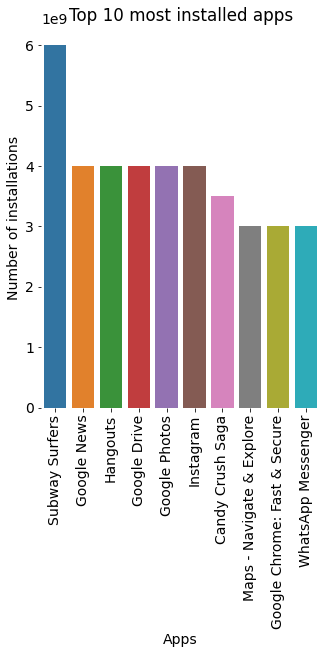

In [ ]:
plt.rcParams["figure.figsize"]=(5,7)
plt.rcParams['font.size']=14.0
sns.barplot(x=final_result["App"],y=final_result["Installs"],data=final_result)
plt.xlabel("Apps")
plt.xticks(rotation=90)
plt.ylabel("Number of installations")
plt.title('Top 10 most installed apps')
sns.despine(left=True, bottom=True)

In [ ]:
final_result.head(5)

,App,Installs
8079,Subway Surfers,6000000000
4933,Google News,4000000000
5118,Hangouts,4000000000
4924,Google Drive,4000000000
4937,Google Photos,4000000000


In [ ]:
total_no_of_installation=ps_data_df_copy['Installs'].sum()

In [ ]:
print(f'{final_result.iloc[0][0]} is installed {final_result.iloc[0][1]} times which accounts for {round((final_result.iloc[0][1]/total_no_of_installation)*100,2)}% alone.')
print(f'{final_result.iloc[1][0]} is installed {final_result.iloc[1][1]} times which accounts for {round((final_result.iloc[1][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[2][0]} is installed {final_result.iloc[2][1]} times which accounts for {round((final_result.iloc[2][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[3][0]} is installed {final_result.iloc[3][1]} times which accounts for {round((final_result.iloc[3][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[4][0]} is installed {final_result.iloc[4][1]} times which accounts for {round((final_result.iloc[4][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[5][0]} is installed {final_result.iloc[5][1]} times which accounts for {round((final_result.iloc[5][1]/total_no_of_installation)*100,2)}% alone.')
print(f'{final_result.iloc[6][0]} is installed {final_result.iloc[6][1]} times which accounts for {round((final_result.iloc[6][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[7][0]} is installed {final_result.iloc[7][1]} times which accounts for {round((final_result.iloc[7][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[8][0]} is installed {final_result.iloc[8][1]} times which accounts for {round((final_result.iloc[8][1]/total_no_of_installation)*100,2)} % alone.')
print(f'{final_result.iloc[9][0]} is installed {final_result.iloc[9][1]} times which accounts for {round((final_result.iloc[9][1]/total_no_of_installation)*100,2)} % alone.')


Subway Surfers is installed 6000000000 times which accounts for 3.58% alone.
Google News is installed 4000000000 times which accounts for 2.39 % alone.
Hangouts is installed 4000000000 times which accounts for 2.39 % alone.
Google Drive is installed 4000000000 times which accounts for 2.39 % alone.
Google Photos is installed 4000000000 times which accounts for 2.39 % alone.
Instagram is installed 4000000000 times which accounts for 2.39% alone.
Candy Crush Saga is installed 3500000000 times which accounts for 2.09 % alone.
Maps - Navigate & Explore is installed 3000000000 times which accounts for 1.79 % alone.
Google Chrome: Fast & Secure is installed 3000000000 times which accounts for 1.79 % alone.
WhatsApp Messenger is installed 3000000000 times which accounts for 1.79 % alone.


# **Visualising Categories**

Text(0.5, 1.0, 'Category wise app counts')

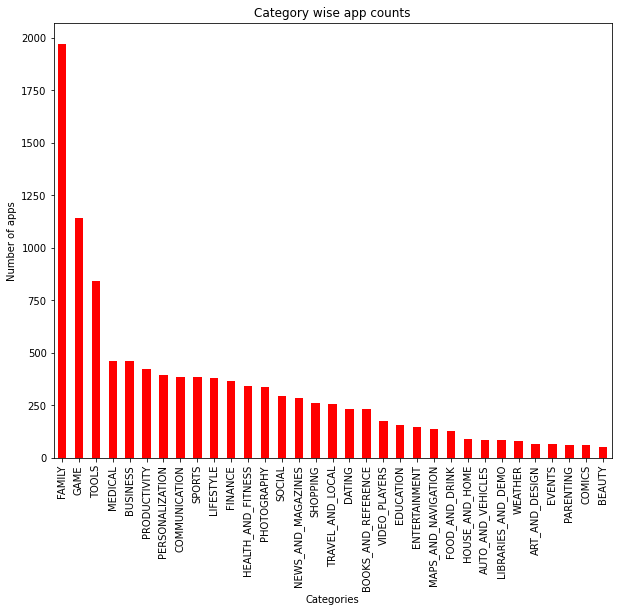

In [ ]:
plt.rcParams["figure.figsize"]=(10,8)
plt.rcParams['font.size']=10.0
ps_data_df_copy['Category'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Categories')
plt.ylabel('Number of apps')
plt.title('Category wise app counts')

In [ ]:
#TOP 5 FAMILY APPS
Family_category=ps_data_df_copy[ps_data_df_copy['Category']=='FAMILY']

In [ ]:
Family_category_result=Family_category.sort_values('Installs',ascending=False).head(5).reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

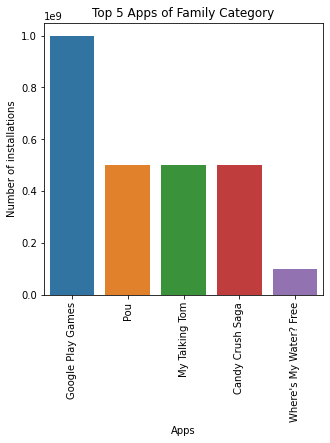

In [ ]:
plt.rcParams["figure.figsize"]=(5,5)
plt.rcParams['font.size']=10.0
sns.barplot("App","Installs",data=Family_category_result)
plt.xlabel('Apps')
plt.ylabel('Number of installations')
plt.title('Top 5 Apps of Family Category')
plt.xticks(rotation=90)